参考自[techforcurious](http://techforcurious.website/how-to-save-data-from-oscilloscope-using-python-in-linux/)

In [1]:
import os
#os.environ['PATH'] = os.environ['PATH']+'C:\\Users\\zhangaq\\AppData\\Local\\Programs\\Python\\Python38\\Lib\\site-packages\\libusb\\_platform\\_windows\\x64;'
print(os.environ['PATH'])

C:\Users\zhangaq\bin;C:\Program Files\Git\mingw64\bin;C:\Program Files\Git\usr\local\bin;C:\Program Files\Git\usr\bin;C:\Program Files\Git\usr\bin;C:\Program Files\Git\mingw64\bin;C:\Program Files\Git\usr\bin;C:\Users\zhangaq\bin;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0;C:\Windows\System32\OpenSSH;C:\Program Files\Microsoft VS Code\bin;C:\Program Files\Java\jdk-11.0.6\bin;C:\Program Files\nodejs;C:\Program Files\Git\cmd;C:\Users\zhangaq\AppData\Local\Programs\Python\Python38\Lib\site-packages\libusb\_platform\_windows;C:\Users\zhangaq\AppData\Local\Programs\Python\Python38\Scripts;C:\Users\zhangaq\AppData\Local\Programs\Python\Python38;C:\Users\zhangaq\AppData\Local\Microsoft\WindowsApps;C:\Users\zhangaq\AppData\Roaming\npm;C:\Program Files\JetBrains\DataGrip 2020.2.3\bin;C:\Program Files\Git\usr\bin\vendor_perl;C:\Program Files\Git\usr\bin\core_perl


In [2]:
import pyvisa as visa
# pyvisa https://pyvisa.readthedocs.io/en/latest/

In [3]:
rm = visa.ResourceManager()

In [4]:
rm.list_resources()

('USB0::0x0699::0x0374::C010063::INSTR', 'ASRL3::INSTR', 'ASRL4::INSTR')

In [5]:
vendorID = '0x699'
modelID = '0x374'
serialNumber = 'C010063'

scope = rm.open_resource('USB0::{}::{}::{}::INSTR'.format(vendorID,modelID,serialNumber))

In [6]:
scope.query("*IDN?")
#scope.write("*IDN?")
#print(scope.read())

'TEKTRONIX,DPO2024,C010063,CF:91.1CT FV:v1.52 \n'

In [46]:
scope.get_visa_attribute()

TypeError: get_visa_attribute() missing 1 required positional argument: 'name'

In [7]:
import numpy as np
import matplotlib.pyplot as plt


In [8]:
# Setting source as Channel 1
scope.write('DATA:SOU CH1')
scope.write('DATA:WIDTH 1') 
scope.write('DATA:ENC RPB')

14

In [9]:
# Getting axis info
ymult = float(scope.query('WFMPRE:YMULT?')) # y-axis least count
yzero = float(scope.query('WFMPRE:YZERO?')) # y-axis zero error
yoff = float(scope.query('WFMPRE:YOFF?')) # y-axis offset
xincr = float(scope.query('WFMPRE:XINCR?')) # x-axis least count

In [40]:
# Reading Binary Data from instrument
scope.write('CURV?')
data = scope.read_raw() # Reading binary data
headerlen = 2 + int(data[1]) # Finding header length
header = data[:headerlen] # Separating header 
ADC_wave = data[headerlen:-1] # Separating data

In [36]:
ADC_wave = scope.query_binary_values('CURV?', datatype='B',container=np.array)

In [41]:
from struct import unpack
ADC_wave = np.array(unpack('%sB' % len(ADC_wave),ADC_wave))

In [42]:
Volts = (ADC_wave - yoff) * ymult + yzero
Time = np.arange(0, xincr * len(Volts), xincr)

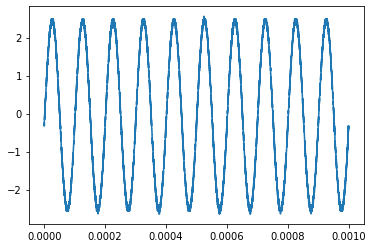

In [43]:
plt.plot(Time, Volts)
plt.show()

In [34]:
ymult

0.08

In [44]:
ADC_wave

array([174, 174, 174, ..., 173, 173, 173])